<a href="https://www.kaggle.com/code/meeratif/titanic-ml-model-regression?scriptVersionId=108458710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
train_file = pd.read_csv('../input/titanic/train.csv')
test_file = pd.read_csv('../input/titanic/test.csv')
sub_file = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
train_file.shape

(891, 12)

In [4]:
train_file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_file.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


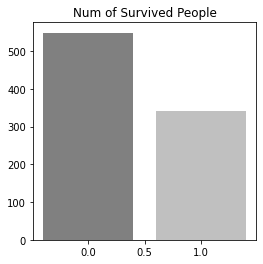

In [9]:
plt.figure(figsize=(4,4))
plt.bar(list(train_file['Survived'].value_counts().keys()), list(train_file['Survived'].value_counts()), color=('grey', 'silver'))
plt.title("Num of Survived People")
plt.show()

In [10]:
train_file['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
sum(train_file['Survived'].isnull())

0

In [12]:
bl_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

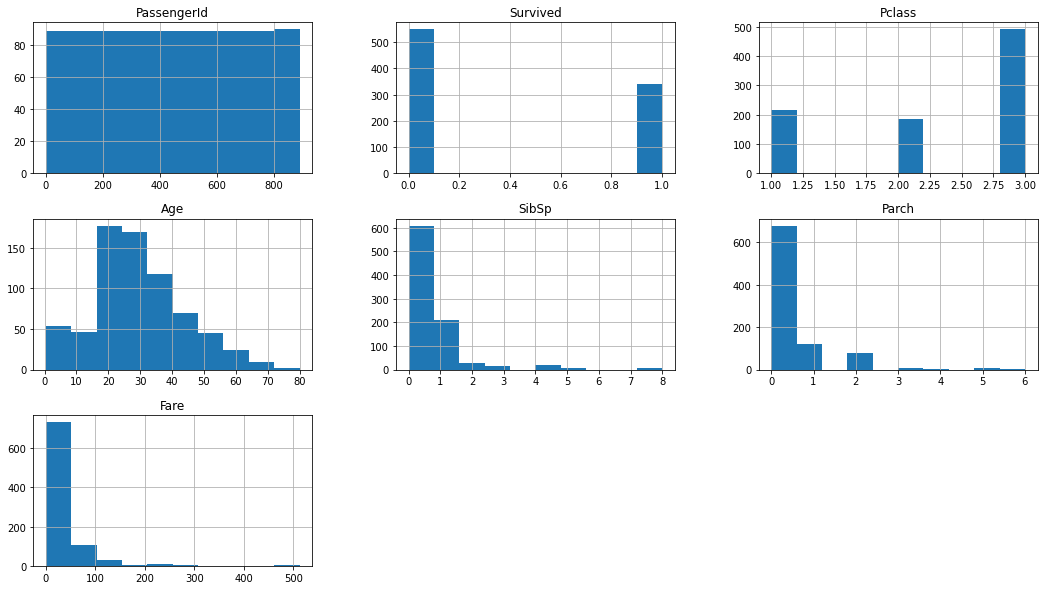

In [13]:
train_file.hist(figsize=(18, 10))
plt.show()

In [14]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

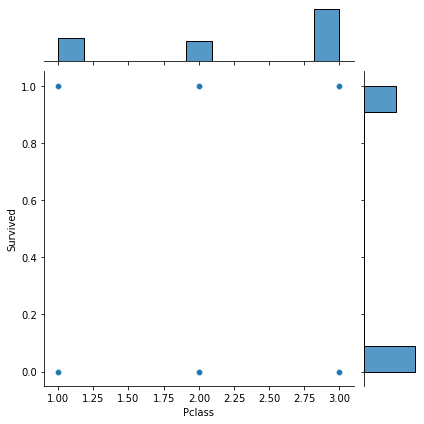

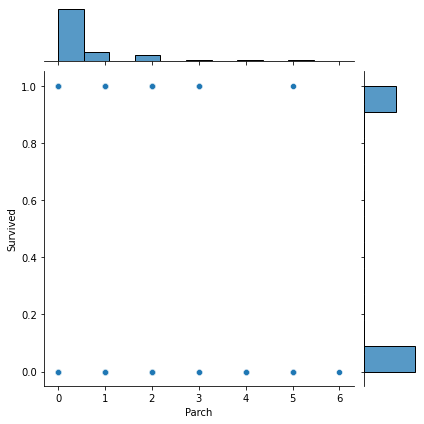

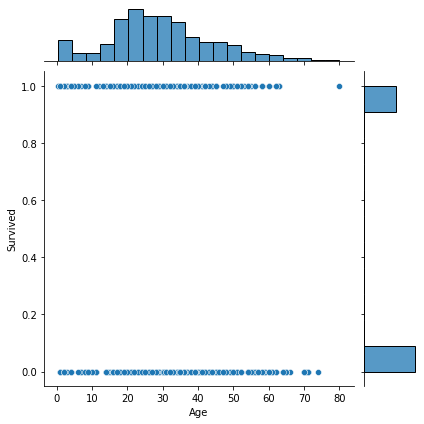

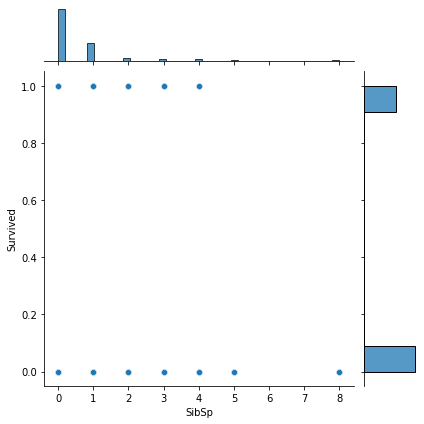

In [15]:
sns.jointplot(data=train_file, x='Pclass', y='Survived')
sns.jointplot(data=train_file, x='Parch', y='Survived')
sns.jointplot(data=train_file, x='Age', y='Survived')
sns.jointplot(data=train_file, x='SibSp', y='Survived')

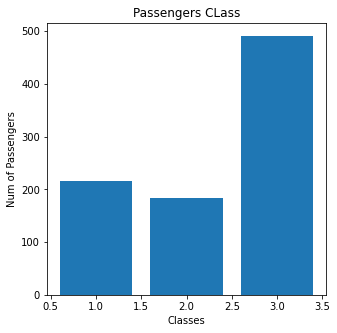

In [16]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Pclass'].value_counts().keys()), list(train_file['Pclass'].value_counts()))
plt.title("Passengers CLass")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()

In [17]:
train_file['Pclass'].value_counts() #Passengers Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

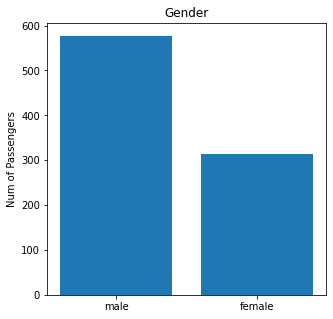

In [18]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Sex'].value_counts().keys()), list(train_file['Sex'].value_counts()))
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

In [19]:
train_file['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

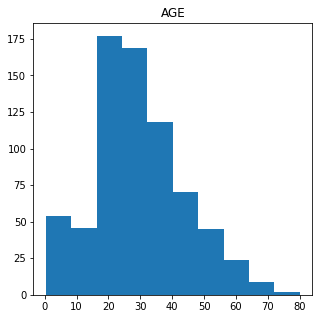

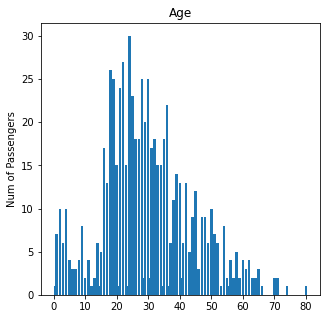

In [20]:
#Historgram
plt.figure(figsize=(5,5))
plt.hist(train_file['Age'])
plt.title("AGE")
plt.show()

#Bar
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Age'].value_counts().keys()), list(train_file['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

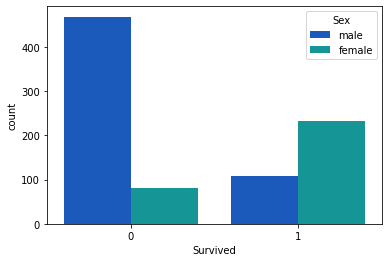

In [21]:
sns.countplot(x="Survived", hue='Sex', data=train_file, palette="winter")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

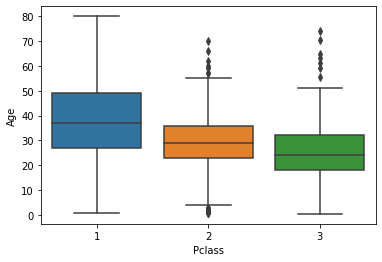

In [22]:
sns.boxplot(x="Pclass", y="Age", data=train_file)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

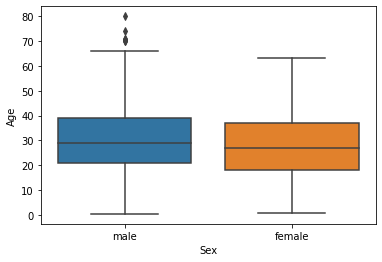

In [23]:
sns.boxplot(x="Sex", y="Age", data=train_file)

In [24]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

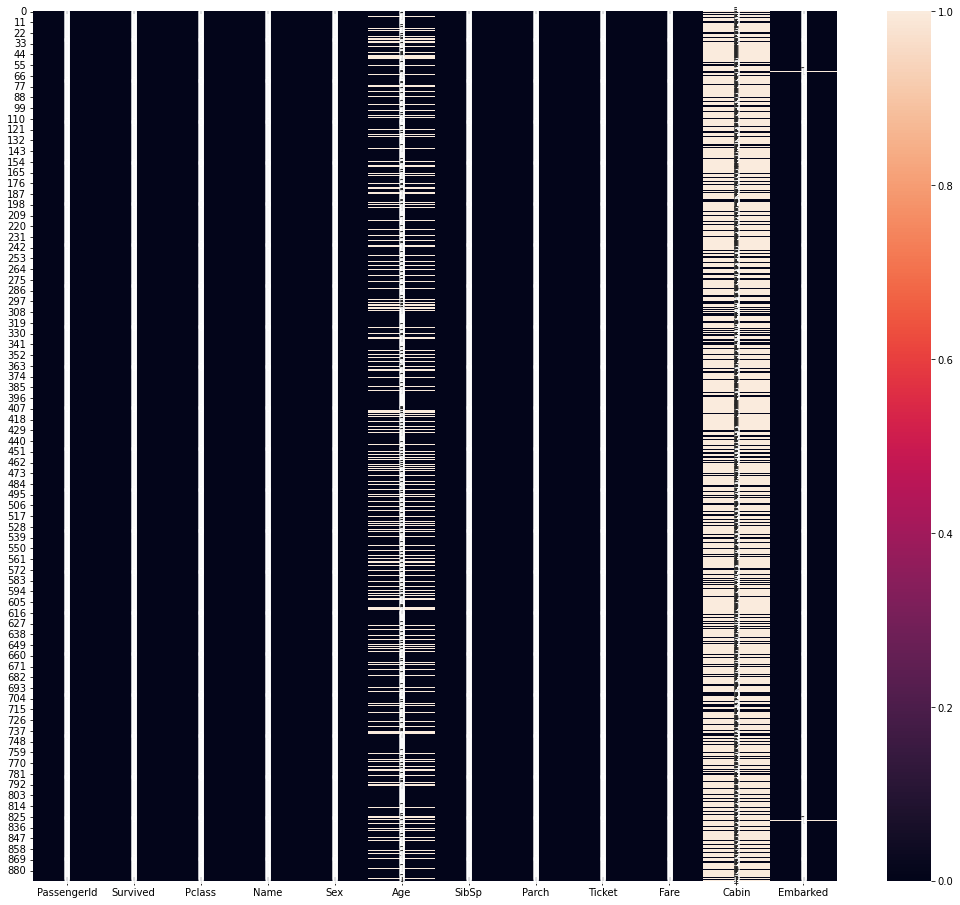

In [25]:
plt.figure(figsize=(18,16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

In [26]:
train_file['Age'] = train_file['Age'].fillna(train_file['Age'].mean())

In [27]:

train_file['Age'].isnull().sum()

0

In [28]:
train_file = train_file.drop('Cabin', axis=True)

In [29]:
train_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


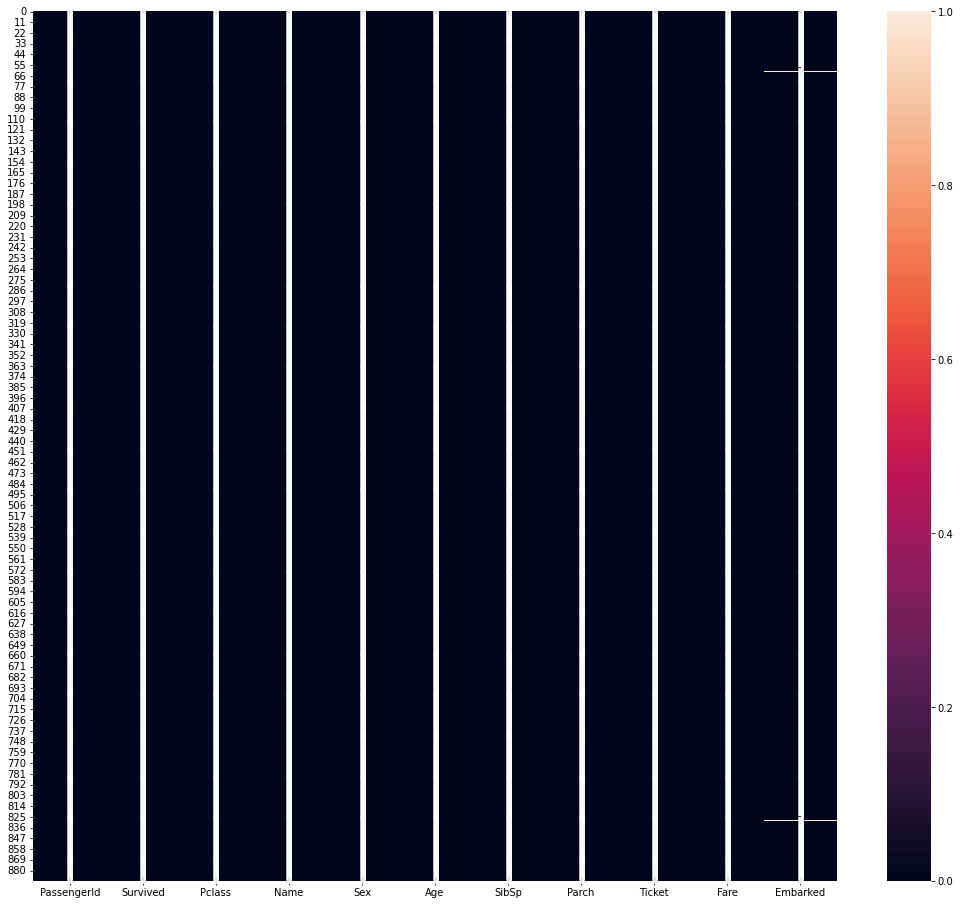

In [30]:
plt.figure(figsize=(18,16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

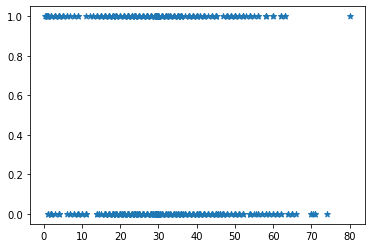

In [31]:
plt.scatter(train_file['Age'], train_file['Survived'], marker="*")

In [32]:
bl_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

In [33]:
str_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [34]:
l_e = LabelEncoder()

In [35]:
for col in str_col:
    train_file[col] = l_e.fit_transform(train_file[col].astype('str'))

In [36]:
x = train_file.drop(["PassengerId", 'Survived'], axis=True)

In [37]:
y = train_file[['PassengerId', "Survived"]]

In [38]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,108,1,22.000000,1,0,523,7.2500,2
1,1,190,0,38.000000,1,0,596,71.2833,0
2,3,353,0,26.000000,0,0,669,7.9250,2
3,1,272,0,35.000000,1,0,49,53.1000,2
4,3,15,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,2,548,1,27.000000,0,0,101,13.0000,2
887,1,303,0,19.000000,0,0,14,30.0000,2
888,3,413,0,29.699118,1,2,675,23.4500,2
889,1,81,1,26.000000,0,0,8,30.0000,0


In [39]:
y

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [40]:
x.corr()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.157112
Name,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.004557
Sex,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.104057
Age,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.022239
SibSp,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.066654
Parch,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.038322
Ticket,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.006041
Fare,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.221226
Embarked,0.157112,-0.004557,0.104057,-0.022239,0.066654,0.038322,-0.006041,-0.221226,1.000000


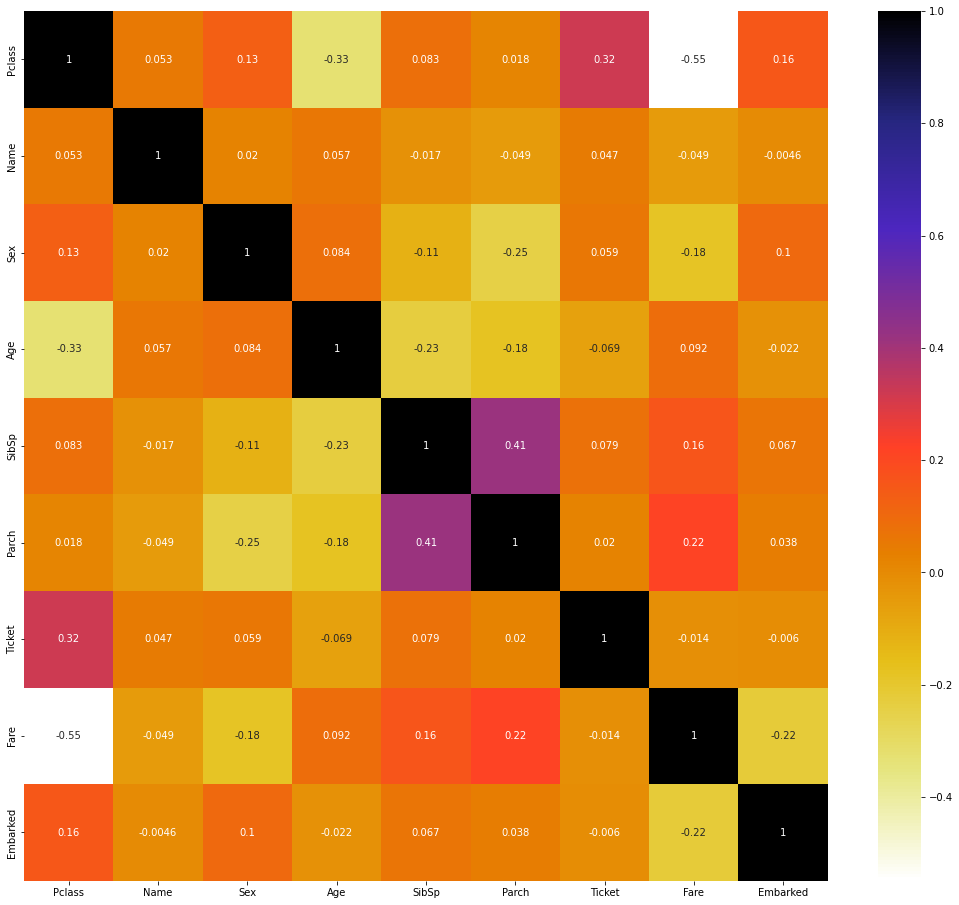

In [41]:
plt.figure(figsize=(18,16))
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

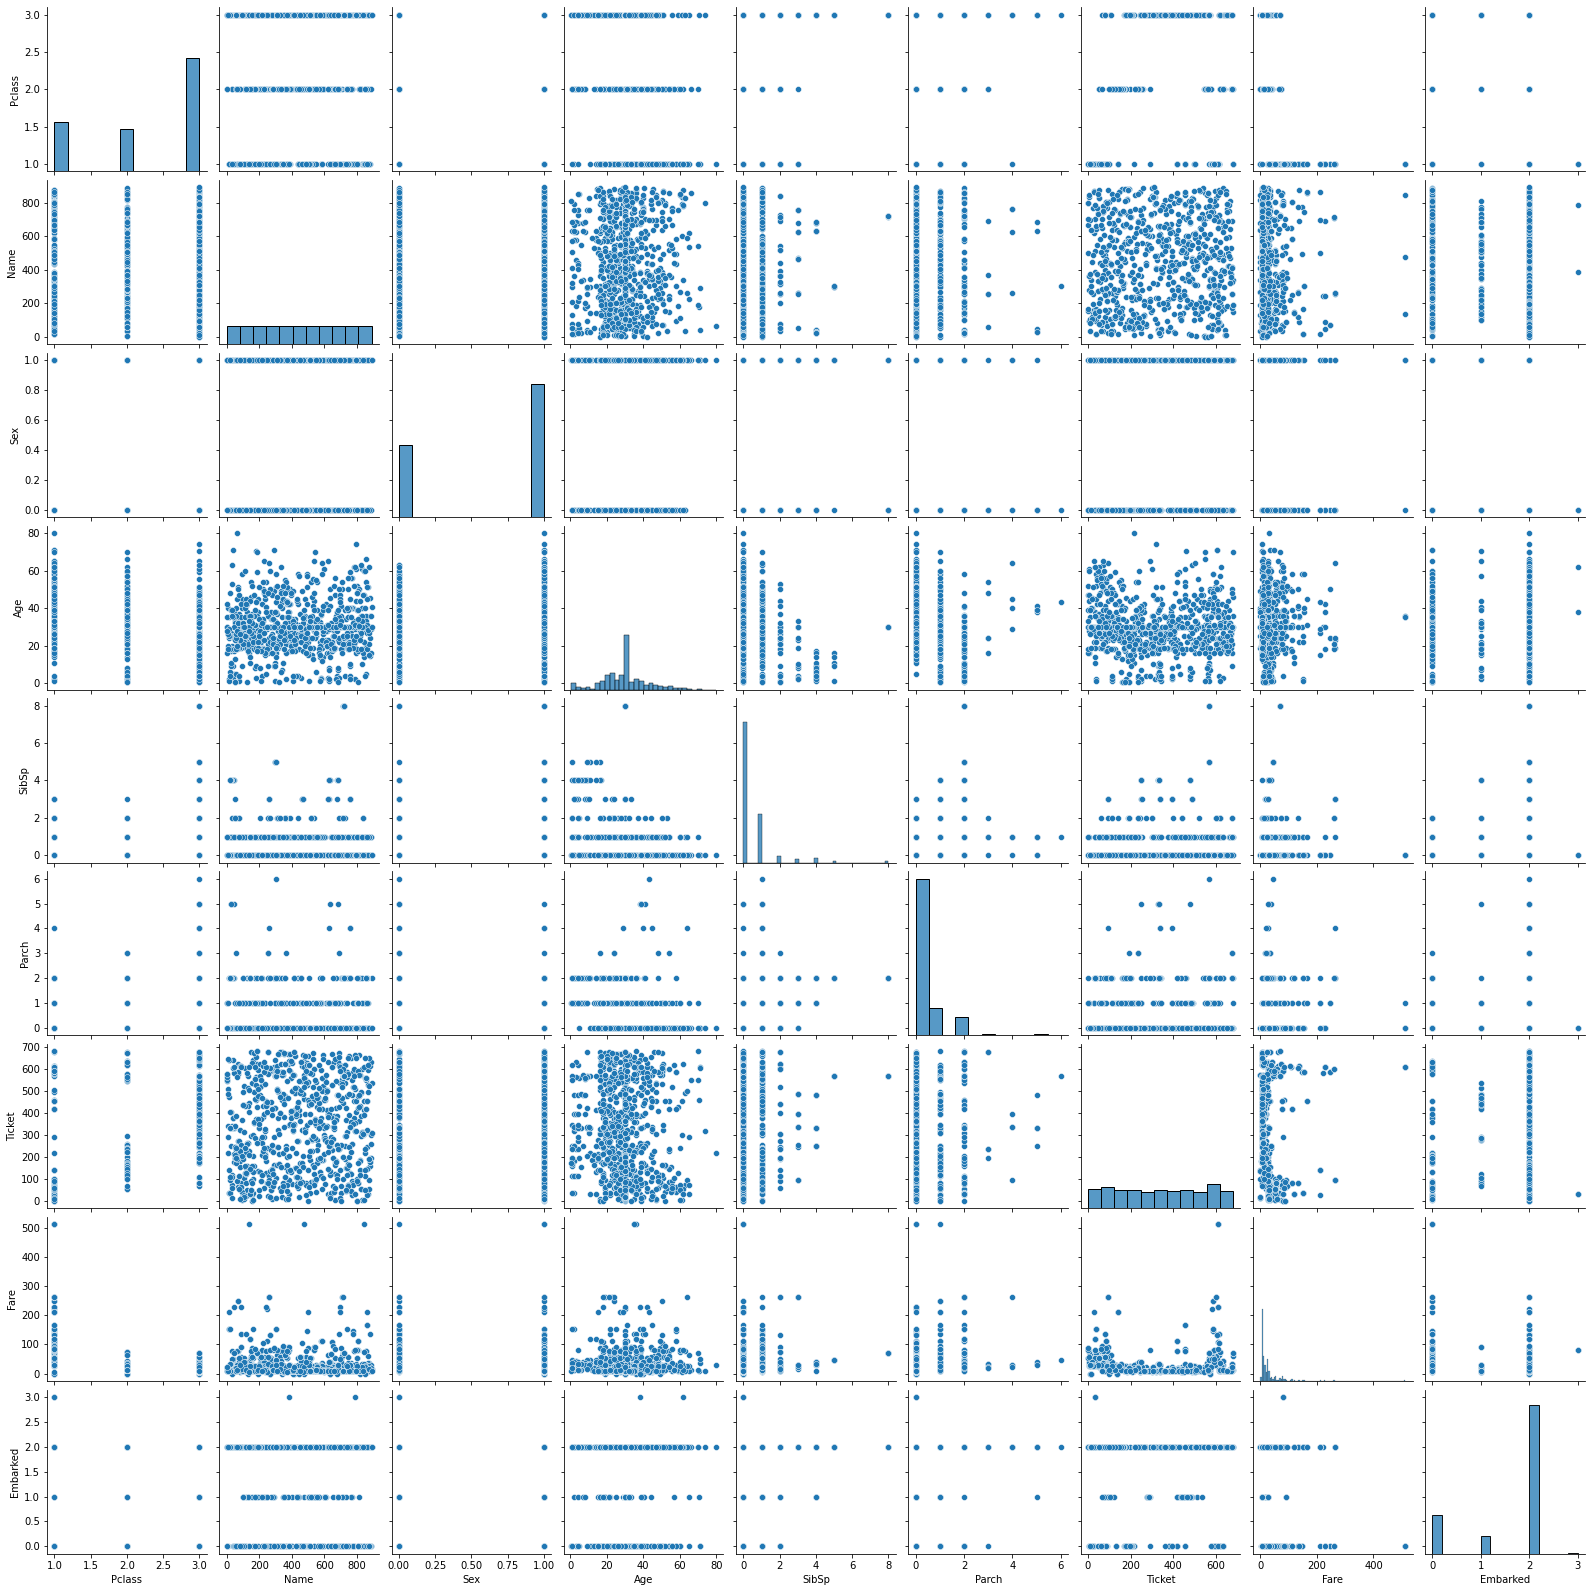

In [42]:
sns.pairplot(x)

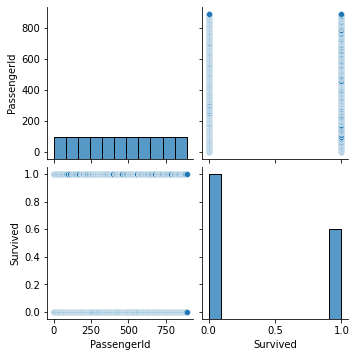

In [43]:
sns.pairplot(y)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=30)

In [46]:
print(y_test, y_train)

     PassengerId  Survived
417          418         1
307          308         1
87            88         0
577          578         1
684          685         0
..           ...       ...
368          369         1
851          852         0
501          502         0
520          521         1
40            41         0

[179 rows x 2 columns]      PassengerId  Survived
199          200         0
703          704         0
823          824         1
236          237         0
679          680         1
..           ...       ...
140          141         0
500          501         0
813          814         0
421          422         0
805          806         0

[712 rows x 2 columns]


In [47]:
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
199,2,881,0,24.000000,0,0,160,13.0000,2
703,3,275,1,25.000000,0,0,449,7.7417,1
823,3,550,0,27.000000,0,1,486,12.4750,2
236,2,370,1,44.000000,1,0,198,26.0000,2
679,1,137,1,36.000000,0,1,608,512.3292,0
...,...,...,...,...,...,...,...,...,...
140,3,99,0,29.699118,0,2,203,15.2458,0
500,3,130,1,17.000000,0,0,261,8.6625,2
813,3,23,0,6.000000,4,2,333,31.2750,2
421,3,155,1,21.000000,0,0,534,7.7333,1


# DecisionTreeClassifier

In [48]:
from sklearn import tree

In [49]:
model = tree.DecisionTreeClassifier()

In [50]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
ypred = model.predict(x_test)
ypred

array([[313,   0],
       [782,   1],
       [512,   0],
       [335,   1],
       [237,   0],
       [429,   0],
       [ 73,   0],
       [373,   0],
       [127,   0],
       [651,   0],
       [146,   0],
       [299,   1],
       [705,   0],
       [837,   0],
       [216,   1],
       [587,   0],
       [ 52,   0],
       [201,   0],
       [383,   0],
       [304,   1],
       [434,   0],
       [ 38,   0],
       [ 21,   0],
       [793,   0],
       [810,   1],
       [401,   1],
       [794,   0],
       [523,   0],
       [336,   0],
       [316,   1],
       [335,   1],
       [867,   1],
       [412,   0],
       [793,   0],
       [657,   0],
       [580,   1],
       [428,   1],
       [ 35,   0],
       [882,   0],
       [853,   0],
       [867,   1],
       [453,   0],
       [822,   1],
       [643,   0],
       [718,   1],
       [452,   0],
       [194,   1],
       [411,   0],
       [464,   0],
       [565,   0],
       [454,   1],
       [488,   0],
       [869,

# K

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [53]:
kn  =  KNeighborsClassifier(n_neighbors = 3)
classifier = MultiOutputClassifier(kn, n_jobs = -1)

In [54]:
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_test)


In [56]:
ypred

array([[313,   0],
       [782,   1],
       [512,   0],
       [335,   1],
       [237,   0],
       [429,   0],
       [ 73,   0],
       [373,   0],
       [127,   0],
       [651,   0],
       [146,   0],
       [299,   1],
       [705,   0],
       [837,   0],
       [216,   1],
       [587,   0],
       [ 52,   0],
       [201,   0],
       [383,   0],
       [304,   1],
       [434,   0],
       [ 38,   0],
       [ 21,   0],
       [793,   0],
       [810,   1],
       [401,   1],
       [794,   0],
       [523,   0],
       [336,   0],
       [316,   1],
       [335,   1],
       [867,   1],
       [412,   0],
       [793,   0],
       [657,   0],
       [580,   1],
       [428,   1],
       [ 35,   0],
       [882,   0],
       [853,   0],
       [867,   1],
       [453,   0],
       [822,   1],
       [643,   0],
       [718,   1],
       [452,   0],
       [194,   1],
       [411,   0],
       [464,   0],
       [565,   0],
       [454,   1],
       [488,   0],
       [869,